In [1]:
import cv2
import os

In [2]:
!nvidia-smi

Sun Feb  2 19:48:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.17                 Driver Version: 561.17         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1070      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   56C    P0             40W /  115W |    1234MiB /   8192MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
1+1

2

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.12.0
GPU disponible: []


In [3]:
import os

In [4]:
os.getcwd()
os.chdir("../")


In [5]:
os.getcwd()

'd:\\Projects_D\\013_OpenCV_Learning\\OpenCV_Learning'

In [6]:
import cv2

import numpy as np
import tensorflow as tf
from pathlib import Path
from src.actionDetection.components.data.preprocessing import FeatureExtractor

# Crear el extractor
extractor = FeatureExtractor(frame_size=(224, 224))

# Procesar un solo video de prueba
video_path = "artifacts/data/raw/train/Haircut/v_Haircut_g01_c03.avi"  # Ajusta esta ruta a uno de tus videos
output_path = Path("artifacts/data/processed/test_features.npy")



In [7]:
# Extraer features
extractor.extract_features(video_path, output_path)

In [8]:
# Cargar y verificar los features extraídos
features = np.load(str(output_path))

In [9]:
# Imprimir información sobre los features
print(f"Shape de los features: {features.shape}")  # Debería ser (num_frames, 1280)
print(f"Número de frames procesados: {len(features)}")
print(f"Dimensionalidad de cada embedding: {features.shape[1]}")  # Debería ser 1280
print("\nPrimeros 5 valores del primer frame:")
print(features[0][:5])  # Ver algunos valores del embedding

Shape de los features: (110, 1280)
Número de frames procesados: 110
Dimensionalidad de cada embedding: 1280

Primeros 5 valores del primer frame:
[-0.10022885 -0.07274975  0.03767195  0.08905215 -0.09744052]


In [10]:
# Verificar que los valores están en un rango razonable
print(f"\nRango de valores:")
print(f"Min: {features.min()}")
print(f"Max: {features.max()}")
print(f"Media: {features.mean()}")
print(f"Desviación estándar: {features.std()}")


Rango de valores:
Min: -0.2319825440645218
Max: 3.877117872238159
Media: 0.14680363237857819
Desviación estándar: 0.323180615901947


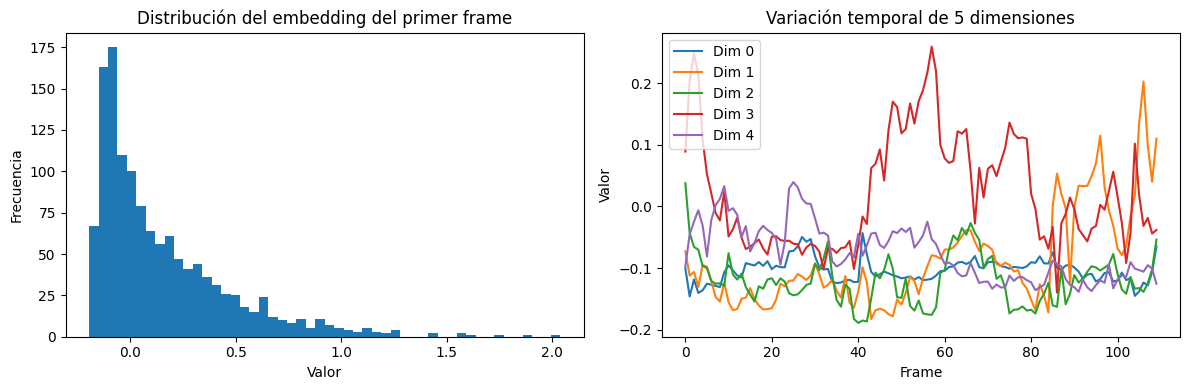


Resumen del modelo:
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0     

In [11]:
# Opcional: Visualizar la distribución de algunos embeddings
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Histograma del primer frame
plt.subplot(1, 2, 1)
plt.hist(features[0], bins=50)
plt.title('Distribución del embedding del primer frame')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Visualizar la variación temporal de algunas dimensiones
plt.subplot(1, 2, 2)
for i in range(5):  # Mostrar 5 dimensiones diferentes
    plt.plot(features[:, i], label=f'Dim {i}')
plt.title('Variación temporal de 5 dimensiones')
plt.xlabel('Frame')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()

# Verificar que el modelo está cargando correctamente
print("\nResumen del modelo:")
extractor.model.summary()

# Videos count

In [1]:
import os

In [2]:
os.getcwd()
os.chdir("../")
os.getcwd()



'd:\\Projects_D\\013_OpenCV_Learning\\OpenCV_Learning'

In [3]:
from pathlib import Path

def count_videos(directory: Path):
    """
    Cuenta videos en un directorio y sus subdirectorios
    """
    video_extensions = ['.mp4', '.avi', '.mov']
    videos_by_class = {}
    total_videos = 0
    
    # Contar videos por clase
    for class_dir in directory.iterdir():
        if class_dir.is_dir():
            class_name = class_dir.name
            video_count = sum(1 for _ in class_dir.rglob("*") if _.suffix.lower() in video_extensions)
            videos_by_class[class_name] = video_count
            total_videos += video_count
    
    return videos_by_class, total_videos

# Directorio raíz
data_dir = Path("artifacts/data/raw")

# Contar videos en cada split
for split in ['train', 'val', 'test']:
    split_dir = data_dir / split
    if split_dir.exists():
        videos_by_class, total = count_videos(split_dir)
        
        print(f"\n{split.upper()} set:")
        print(f"Total videos: {total}")
        print("\nVideos por clase:")
        for class_name, count in sorted(videos_by_class.items()):
            print(f"{class_name}: {count}")


VAL set:
Total videos: 1673

Videos por clase:
ApplyEyeMakeup: 18
ApplyLipstick: 14
Archery: 18
BabyCrawling: 16
BalanceBeam: 13
BandMarching: 19
BaseballPitch: 19
Basketball: 33
BasketballDunk: 16
BenchPress: 20
Biking: 17
Billiards: 19
BlowDryHair: 16
BlowingCandles: 14
BodyWeightSquats: 14
Bowling: 19
BoxingPunchingBag: 20
BoxingSpeedBag: 17
BreastStroke: 13
BrushingTeeth: 16
CleanAndJerk: 14
CliffDiving: 17
CricketBowling: 17
CricketShot: 21
CuttingInKitchen: 14
Diving: 19
Drumming: 20
Fencing: 14
FieldHockeyPenalty: 16
FloorGymnastics: 16
FrisbeeCatch: 16
FrontCrawl: 17
GolfSwing: 17
Haircut: 16
HammerThrow: 19
Hammering: 17
HandstandPushups: 16
HandstandWalking: 14
HeadMassage: 18
HighJump: 15
HorseRace: 15
HorseRiding: 20
HulaHoop: 16
IceDancing: 20
JavelinThrow: 15
JugglingBalls: 15
JumpRope: 18
JumpingJack: 15
Kayaking: 18
Knitting: 15
LongJump: 16
Lunges: 16
MilitaryParade: 16
Mixing: 17
MoppingFloor: 14
Nunchucks: 16
ParallelBars: 14
PizzaTossing: 14
PlayingCello: 20
Playin

In [4]:
# Contar total global
total_global = sum(count_videos(data_dir / split)[1] for split in ['train', 'val', 'test'] if (data_dir / split).exists())
print(f"\nTotal global de videos: {total_global}")

# Estimar tiempo de procesamiento
# Asumiendo ~1 segundo por video (esto es una estimación, el tiempo real dependerá de tu hardware)
estimated_time = total_global * 30  # segundos
print(f"\nTiempo estimado de procesamiento:")
print(f"- En segundos: {estimated_time}")
print(f"- En minutos: {estimated_time/60:.2f}")
print(f"- En horas: {estimated_time/3600:.2f}")


Total global de videos: 13451

Tiempo estimado de procesamiento:
- En segundos: 403530
- En minutos: 6725.50
- En horas: 112.09


# Embeddings for Val and Test

In [5]:
import cv2
import numpy as np
import tensorflow as tf
from pathlib import Path
from tqdm import tqdm
from src.actionDetection.components.data.preprocessing import FeatureExtractor

In [8]:
import time

In [6]:
# Crear el extractor
extractor = FeatureExtractor(frame_size=(224, 224))

# Directorios base
raw_dir = Path("artifacts/data/raw")
processed_dir = Path("artifacts/data/processed")

In [7]:
# Procesar solo val y test
splits_to_process = ['val', 'test']

In [ ]:
# import cv2
# import numpy as np
# import tensorflow as tf
# from pathlib import Path
# from tqdm import tqdm
# from src.actionDetection.components.data.preprocessing import FeatureExtractor
# import time
# # Crear el extractor
# extractor = FeatureExtractor(frame_size=(224, 224))

# # Directorios base
# raw_dir = Path("artifacts/data/raw")
# processed_dir = Path("artifacts/data/processed")
# # Procesar solo val y test
# splits_to_process = ['val', 'test']

# for split in splits_to_process:
#     print(f"\nProcesando split: {split}")
    
#     input_dir = raw_dir / split
#     output_dir = processed_dir / split
    
#     # Obtener lista de todos los videos a procesar
#     video_paths = []
#     video_extensions = ['.avi', '.mp4', '.mov', '.mkv']  # Añadimos más extensiones comunes
    
#     for class_dir in input_dir.iterdir():
#         if class_dir.is_dir():
#             # Crear directorio de salida para esta clase
#             (output_dir / class_dir.name).mkdir(parents=True, exist_ok=True)
            
#             # Añadir videos de esta clase a la lista, buscando múltiples extensiones
#             for ext in video_extensions:
#                 video_paths.extend([
#                     (video_path, class_dir.name) 
#                     for video_path in class_dir.glob(f"*{ext}")
#                 ])
    
#     print(f"Encontrados {len(video_paths)} videos en {split}")
    
#     # Variables para estadísticas
#     total_process_time = 0
#     total_video_duration = 0
#     processed_count = 0
    
#     # Crear/cargar archivo de progreso
#     progress_file = processed_dir / f"{split}_progress.txt"
#     processed_videos = set()
#     if progress_file.exists():
#         with open(progress_file, 'r') as f:
#             processed_videos = set(f.read().splitlines())
        
#         # Actualizar contador con videos ya procesados
#         processed_count = len(processed_videos)
#         print(f"Reanudando desde {processed_count} videos procesados anteriormente")
    
#     try:
#         # Procesar cada video con barra de progreso
#         for video_path, class_name in tqdm(video_paths, desc=f"Procesando {split}"):
#             # Saltar videos ya procesados
#             if str(video_path) in processed_videos:
#                 continue
                
#             try:
#                 start_time = time.time()
                
#                 # Obtener duración del video
#                 cap = cv2.VideoCapture(str(video_path))
#                 fps = cap.get(cv2.CAP_PROP_FPS)
#                 frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#                 video_duration = frame_count / fps
#                 cap.release()
                
#                 # Crear ruta de salida manteniendo la estructura
#                 output_path = output_dir / class_name / f"{video_path.stem}_features.npy"
                
#                 # Extraer y guardar features
#                 extractor.extract_features(str(video_path), output_path)
                
#                 # Actualizar estadísticas
#                 process_time = time.time() - start_time
#                 total_process_time += process_time
#                 total_video_duration += video_duration
#                 processed_count += 1
                
#                 # Guardar progreso
#                 with open(progress_file, 'a') as f:
#                     f.write(f"{str(video_path)}\n")
                
#                 # Mostrar estadísticas actualizadas
#                 remaining = len(video_paths) - processed_count
#                 avg_process_time = total_process_time / processed_count
#                 avg_video_duration = total_video_duration / processed_count
                
#                 print(f"\nEstadísticas actualizadas:")
#                 print(f"- Videos procesados: {processed_count}/{len(video_paths)} (Quedan {remaining})")
#                 print(f"- Tiempo medio de procesamiento: {avg_process_time:.2f} segundos")
#                 print(f"- Duración media de los videos: {avg_video_duration:.2f} segundos")
#                 print(f"- Tiempo estimado restante: {remaining * avg_process_time:.2f} segundos")
                
#             except Exception as e:
#                 print(f"Error procesando {video_path}: {str(e)}")
                
#     except KeyboardInterrupt:
#         print(f"\nProceso interrumpido. Progreso guardado en {progress_file}")
#         print(f"Para continuar, simplemente ejecuta el script de nuevo.")
#         # Re-lanzar la excepción para asegurar que el notebook se detiene
#         raise KeyboardInterrupt

#     # Mostrar estadísticas finales del split
#     if processed_count > 0:
#         print(f"\nEstadísticas finales para {split}:")
#         print(f"- Total de videos procesados: {processed_count}")
#         print(f"- Tiempo medio de procesamiento: {total_process_time/processed_count:.2f} segundos")
#         print(f"- Duración media de los videos: {total_video_duration/processed_count:.2f} segundos")

# print("\n¡Procesamiento completado!")

In [10]:
for split in splits_to_process:
    print(f"\nProcesando split: {split}")
    
    input_dir = raw_dir / split
    output_dir = processed_dir / split
    
    # Obtener lista de todos los videos a procesar
    video_paths = []
    video_extensions = ['.avi', '.mp4', '.mov', '.mkv']  # Añadimos más extensiones comunes
    
    for class_dir in input_dir.iterdir():
        if class_dir.is_dir():
            # Crear directorio de salida para esta clase
            (output_dir / class_dir.name).mkdir(parents=True, exist_ok=True)
            
            # Añadir videos de esta clase a la lista, buscando múltiples extensiones
            for ext in video_extensions:
                video_paths.extend([
                    (video_path, class_dir.name) 
                    for video_path in class_dir.glob(f"*{ext}")
                ])
    
    print(f"Encontrados {len(video_paths)} videos en {split}")
    
    # Variables para estadísticas
    total_process_time = 0
    total_video_duration = 0
    processed_count = 0
    
    # Crear/cargar archivo de progreso
    progress_file = processed_dir / f"{split}_progress.txt"
    processed_videos = set()
    if progress_file.exists():
        with open(progress_file, 'r') as f:
            processed_videos = set(f.read().splitlines())
        
        # Actualizar contador con videos ya procesados
        processed_count = len(processed_videos)
        print(f"Reanudando desde {processed_count} videos procesados anteriormente")
    
    try:
        # Procesar cada video con barra de progreso
        for video_path, class_name in tqdm(video_paths, desc=f"Procesando {split}"):
            # Saltar videos ya procesados
            if str(video_path) in processed_videos:
                continue
                
            try:
                start_time = time.time()
                
                # Obtener duración del video
                cap = cv2.VideoCapture(str(video_path))
                fps = cap.get(cv2.CAP_PROP_FPS)
                frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                video_duration = frame_count / fps
                cap.release()
                
                # Crear ruta de salida manteniendo la estructura
                output_path = output_dir / class_name / f"{video_path.stem}_features.npy"
                
                # Extraer y guardar features
                extractor.extract_features(str(video_path), output_path)
                
                # Actualizar estadísticas
                process_time = time.time() - start_time
                total_process_time += process_time
                total_video_duration += video_duration
                processed_count += 1
                
                # Guardar progreso
                with open(progress_file, 'a') as f:
                    f.write(f"{str(video_path)}\n")
                
                # Mostrar estadísticas actualizadas
                remaining = len(video_paths) - processed_count
                avg_process_time = total_process_time / processed_count
                avg_video_duration = total_video_duration / processed_count
                
                print(f"\nEstadísticas actualizadas:")
                print(f"- Videos procesados: {processed_count}/{len(video_paths)} (Quedan {remaining})")
                print(f"- Tiempo medio de procesamiento: {avg_process_time:.2f} segundos")
                print(f"- Duración media de los videos: {avg_video_duration:.2f} segundos")
                print(f"- Tiempo estimado restante: {remaining * avg_process_time:.2f} segundos")
                
            except Exception as e:
                print(f"Error procesando {video_path}: {str(e)}")
                
    except KeyboardInterrupt:
        print(f"\nProceso interrumpido. Progreso guardado en {progress_file}")
        print(f"Para continuar, simplemente ejecuta el script de nuevo.")
        # Re-lanzar la excepción para asegurar que el notebook se detiene
        raise KeyboardInterrupt

    # Mostrar estadísticas finales del split
    if processed_count > 0:
        print(f"\nEstadísticas finales para {split}:")
        print(f"- Total de videos procesados: {processed_count}")
        print(f"- Tiempo medio de procesamiento: {total_process_time/processed_count:.2f} segundos")
        print(f"- Duración media de los videos: {total_video_duration/processed_count:.2f} segundos")

print("\n¡Procesamiento completado!")



Procesando split: val
Encontrados 1673 videos en val


Procesando val:   0%|          | 1/1673 [00:34<16:10:46, 34.84s/it]


Estadísticas actualizadas:
- Videos procesados: 1/1673 (Quedan 1672)
- Tiempo medio de procesamiento: 34.55 segundos
- Duración media de los videos: 5.84 segundos
- Tiempo estimado restante: 57760.38 segundos


Procesando val:   0%|          | 2/1673 [01:37<23:43:35, 51.12s/it]


Estadísticas actualizadas:
- Videos procesados: 2/1673 (Quedan 1671)
- Tiempo medio de procesamiento: 48.38 segundos
- Duración media de los videos: 8.28 segundos
- Tiempo estimado restante: 80842.33 segundos


Procesando val:   0%|          | 3/1673 [02:31<24:25:51, 52.67s/it]


Estadísticas actualizadas:
- Videos procesados: 3/1673 (Quedan 1670)
- Tiempo medio de procesamiento: 50.42 segundos
- Duración media de los videos: 8.65 segundos
- Tiempo estimado restante: 84205.90 segundos


Procesando val:   0%|          | 4/1673 [03:12<22:14:40, 47.98s/it]


Estadísticas actualizadas:
- Videos procesados: 4/1673 (Quedan 1669)
- Tiempo medio de procesamiento: 48.02 segundos
- Duración media de los videos: 8.16 segundos
- Tiempo estimado restante: 80139.40 segundos


Procesando val:   0%|          | 5/1673 [03:44<19:33:44, 42.22s/it]


Estadísticas actualizadas:
- Videos procesados: 5/1673 (Quedan 1668)
- Tiempo medio de procesamiento: 44.81 segundos
- Duración media de los videos: 7.66 segundos
- Tiempo estimado restante: 74749.90 segundos


Procesando val:   0%|          | 6/1673 [04:20<18:35:53, 40.16s/it]


Estadísticas actualizadas:
- Videos procesados: 6/1673 (Quedan 1667)
- Tiempo medio de procesamiento: 43.37 segundos
- Duración media de los videos: 7.36 segundos
- Tiempo estimado restante: 72303.30 segundos


Procesando val:   0%|          | 7/1673 [05:21<21:44:00, 46.96s/it]


Estadísticas actualizadas:
- Videos procesados: 7/1673 (Quedan 1666)
- Tiempo medio de procesamiento: 45.89 segundos
- Duración media de los videos: 7.59 segundos
- Tiempo estimado restante: 76445.47 segundos


Procesando val:   0%|          | 8/1673 [06:07<21:33:07, 46.60s/it]


Estadísticas actualizadas:
- Videos procesados: 8/1673 (Quedan 1665)
- Tiempo medio de procesamiento: 45.88 segundos
- Duración media de los videos: 7.58 segundos
- Tiempo estimado restante: 76385.68 segundos


Procesando val:   1%|          | 9/1673 [06:50<21:00:54, 45.47s/it]


Estadísticas actualizadas:
- Videos procesados: 9/1673 (Quedan 1664)
- Tiempo medio de procesamiento: 45.55 segundos
- Duración media de los videos: 7.53 segundos
- Tiempo estimado restante: 75802.41 segundos


Procesando val:   1%|          | 10/1673 [07:22<19:05:26, 41.33s/it]


Estadísticas actualizadas:
- Videos procesados: 10/1673 (Quedan 1663)
- Tiempo medio de procesamiento: 44.20 segundos
- Duración media de los videos: 7.28 segundos
- Tiempo estimado restante: 73512.54 segundos


Procesando val:   1%|          | 11/1673 [08:03<18:56:32, 41.03s/it]


Estadísticas actualizadas:
- Videos procesados: 11/1673 (Quedan 1662)
- Tiempo medio de procesamiento: 43.85 segundos
- Duración media de los videos: 7.24 segundos
- Tiempo estimado restante: 72886.87 segundos


Procesando val:   1%|          | 12/1673 [08:47<19:26:46, 42.15s/it]


Estadísticas actualizadas:
- Videos procesados: 12/1673 (Quedan 1661)
- Tiempo medio de procesamiento: 43.93 segundos
- Duración media de los videos: 7.24 segundos
- Tiempo estimado restante: 72960.03 segundos


Procesando val:   1%|          | 13/1673 [09:12<17:00:56, 36.90s/it]


Estadísticas actualizadas:
- Videos procesados: 13/1673 (Quedan 1660)
- Tiempo medio de procesamiento: 42.46 segundos
- Duración media de los videos: 6.98 segundos
- Tiempo estimado restante: 70477.82 segundos


Procesando val:   1%|          | 14/1673 [09:53<17:35:32, 38.18s/it]


Estadísticas actualizadas:
- Videos procesados: 14/1673 (Quedan 1659)
- Tiempo medio de procesamiento: 42.36 segundos
- Duración media de los videos: 6.97 segundos
- Tiempo estimado restante: 70276.50 segundos


Procesando val:   1%|          | 15/1673 [10:46<19:38:19, 42.64s/it]


Estadísticas actualizadas:
- Videos procesados: 15/1673 (Quedan 1658)
- Tiempo medio de procesamiento: 43.07 segundos
- Duración media de los videos: 7.09 segundos
- Tiempo estimado restante: 71409.18 segundos


Procesando val:   1%|          | 16/1673 [11:28<19:30:00, 42.37s/it]


Estadísticas actualizadas:
- Videos procesados: 16/1673 (Quedan 1657)
- Tiempo medio de procesamiento: 42.99 segundos
- Duración media de los videos: 7.08 segundos
- Tiempo estimado restante: 71226.77 segundos


Procesando val:   1%|          | 17/1673 [12:22<21:04:11, 45.80s/it]


Estadísticas actualizadas:
- Videos procesados: 17/1673 (Quedan 1656)
- Tiempo medio de procesamiento: 43.62 segundos
- Duración media de los videos: 7.18 segundos
- Tiempo estimado restante: 72237.15 segundos


Procesando val:   1%|          | 18/1673 [12:58<19:43:21, 42.90s/it]


Estadísticas actualizadas:
- Videos procesados: 18/1673 (Quedan 1655)
- Tiempo medio de procesamiento: 43.21 segundos
- Duración media de los videos: 7.10 segundos
- Tiempo estimado restante: 71505.73 segundos


Procesando val:   1%|          | 19/1673 [13:48<20:39:19, 44.96s/it]


Estadísticas actualizadas:
- Videos procesados: 19/1673 (Quedan 1654)
- Tiempo medio de procesamiento: 43.55 segundos
- Duración media de los videos: 7.18 segundos
- Tiempo estimado restante: 72031.84 segundos


Procesando val:   1%|          | 20/1673 [14:19<18:50:09, 41.02s/it]


Estadísticas actualizadas:
- Videos procesados: 20/1673 (Quedan 1653)
- Tiempo medio de procesamiento: 42.97 segundos
- Duración media de los videos: 7.07 segundos
- Tiempo estimado restante: 71021.18 segundos


Procesando val:   1%|▏         | 21/1673 [15:12<20:25:26, 44.51s/it]


Estadísticas actualizadas:
- Videos procesados: 21/1673 (Quedan 1652)
- Tiempo medio de procesamiento: 43.43 segundos
- Duración media de los videos: 7.13 segundos
- Tiempo estimado restante: 71738.84 segundos


Procesando val:   1%|▏         | 22/1673 [15:40<18:10:17, 39.62s/it]


Estadísticas actualizadas:
- Videos procesados: 22/1673 (Quedan 1651)
- Tiempo medio de procesamiento: 42.73 segundos
- Duración media de los videos: 7.02 segundos
- Tiempo estimado restante: 70552.87 segundos


Procesando val:   1%|▏         | 23/1673 [16:06<16:14:04, 35.42s/it]


Estadísticas actualizadas:
- Videos procesados: 23/1673 (Quedan 1650)
- Tiempo medio de procesamiento: 41.99 segundos
- Duración media de los videos: 6.90 segundos
- Tiempo estimado restante: 69282.16 segundos


Procesando val:   1%|▏         | 24/1673 [16:58<18:27:31, 40.30s/it]


Estadísticas actualizadas:
- Videos procesados: 24/1673 (Quedan 1649)
- Tiempo medio de procesamiento: 42.39 segundos
- Duración media de los videos: 6.97 segundos
- Tiempo estimado restante: 69905.49 segundos


Procesando val:   1%|▏         | 25/1673 [17:41<18:51:27, 41.19s/it]


Estadísticas actualizadas:
- Videos procesados: 25/1673 (Quedan 1648)
- Tiempo medio de procesamiento: 42.43 segundos
- Duración media de los videos: 6.97 segundos
- Tiempo estimado restante: 69921.91 segundos


Procesando val:   2%|▏         | 26/1673 [18:21<18:38:11, 40.74s/it]


Estadísticas actualizadas:
- Videos procesados: 26/1673 (Quedan 1647)
- Tiempo medio de procesamiento: 42.32 segundos
- Duración media de los videos: 6.95 segundos
- Tiempo estimado restante: 69704.31 segundos


Procesando val:   2%|▏         | 27/1673 [18:53<17:31:40, 38.34s/it]


Estadísticas actualizadas:
- Videos procesados: 27/1673 (Quedan 1646)
- Tiempo medio de procesamiento: 41.97 segundos
- Duración media de los videos: 6.89 segundos
- Tiempo estimado restante: 69077.51 segundos


Procesando val:   2%|▏         | 28/1673 [19:33<17:39:56, 38.66s/it]


Estadísticas actualizadas:
- Videos procesados: 28/1673 (Quedan 1645)
- Tiempo medio de procesamiento: 41.88 segundos
- Duración media de los videos: 6.87 segundos
- Tiempo estimado restante: 68885.74 segundos


Procesando val:   2%|▏         | 29/1673 [20:06<16:52:27, 36.95s/it]


Estadísticas actualizadas:
- Videos procesados: 29/1673 (Quedan 1644)
- Tiempo medio de procesamiento: 41.57 segundos
- Duración media de los videos: 6.82 segundos
- Tiempo estimado restante: 68338.61 segundos


Procesando val:   2%|▏         | 30/1673 [20:48<17:35:58, 38.56s/it]


Estadísticas actualizadas:
- Videos procesados: 30/1673 (Quedan 1643)
- Tiempo medio de procesamiento: 41.59 segundos
- Duración media de los videos: 6.83 segundos
- Tiempo estimado restante: 68338.27 segundos


Procesando val:   2%|▏         | 31/1673 [21:44<19:57:28, 43.76s/it]


Estadísticas actualizadas:
- Videos procesados: 31/1673 (Quedan 1642)
- Tiempo medio de procesamiento: 42.05 segundos
- Duración media de los videos: 6.88 segundos
- Tiempo estimado restante: 69053.13 segundos


Procesando val:   2%|▏         | 32/1673 [22:14<18:01:53, 39.56s/it]


Estadísticas actualizadas:
- Videos procesados: 32/1673 (Quedan 1641)
- Tiempo medio de procesamiento: 41.67 segundos
- Duración media de los videos: 6.82 segundos
- Tiempo estimado restante: 68380.53 segundos


Procesando val:   2%|▏         | 33/1673 [22:55<18:18:45, 40.20s/it]


Estadísticas actualizadas:
- Videos procesados: 33/1673 (Quedan 1640)
- Tiempo medio de procesamiento: 41.67 segundos
- Duración media de los videos: 6.80 segundos
- Tiempo estimado restante: 68339.98 segundos


Procesando val:   2%|▏         | 34/1673 [23:31<17:40:17, 38.81s/it]


Estadísticas actualizadas:
- Videos procesados: 34/1673 (Quedan 1639)
- Tiempo medio de procesamiento: 41.49 segundos
- Duración media de los videos: 6.76 segundos
- Tiempo estimado restante: 68004.94 segundos


Procesando val:   2%|▏         | 35/1673 [23:52<15:12:23, 33.42s/it]


Estadísticas actualizadas:
- Videos procesados: 35/1673 (Quedan 1638)
- Tiempo medio de procesamiento: 40.90 segundos
- Duración media de los videos: 6.66 segundos
- Tiempo estimado restante: 66996.64 segundos


Procesando val:   2%|▏         | 36/1673 [24:10<13:06:43, 28.84s/it]


Estadísticas actualizadas:
- Videos procesados: 36/1673 (Quedan 1637)
- Tiempo medio de procesamiento: 40.27 segundos
- Duración media de los videos: 6.56 segundos
- Tiempo estimado restante: 65920.46 segundos


Procesando val:   2%|▏         | 37/1673 [24:31<12:04:53, 26.59s/it]


Estadísticas actualizadas:
- Videos procesados: 37/1673 (Quedan 1636)
- Tiempo medio de procesamiento: 39.76 segundos
- Duración media de los videos: 6.47 segundos
- Tiempo estimado restante: 65042.97 segundos


Procesando val:   2%|▏         | 38/1673 [24:53<11:26:42, 25.20s/it]


Estadísticas actualizadas:
- Videos procesados: 38/1673 (Quedan 1635)
- Tiempo medio de procesamiento: 39.29 segundos
- Duración media de los videos: 6.39 segundos
- Tiempo estimado restante: 64237.82 segundos


Procesando val:   2%|▏         | 39/1673 [25:40<14:19:33, 31.56s/it]


Estadísticas actualizadas:
- Videos procesados: 39/1673 (Quedan 1634)
- Tiempo medio de procesamiento: 39.47 segundos
- Duración media de los videos: 6.40 segundos
- Tiempo estimado restante: 64496.72 segundos


Procesando val:   2%|▏         | 40/1673 [26:49<19:24:51, 42.80s/it]


Estadísticas actualizadas:
- Videos procesados: 40/1673 (Quedan 1633)
- Tiempo medio de procesamiento: 40.21 segundos
- Duración media de los videos: 6.51 segundos
- Tiempo estimado restante: 65663.38 segundos


Procesando val:   2%|▏         | 41/1673 [27:32<19:26:38, 42.89s/it]


Estadísticas actualizadas:
- Videos procesados: 41/1673 (Quedan 1632)
- Tiempo medio de procesamiento: 40.28 segundos
- Duración media de los videos: 6.51 segundos
- Tiempo estimado restante: 65738.37 segundos


Procesando val:   3%|▎         | 42/1673 [28:35<22:14:53, 49.11s/it]


Estadísticas actualizadas:
- Videos procesados: 42/1673 (Quedan 1631)
- Tiempo medio de procesamiento: 40.84 segundos
- Duración media de los videos: 6.58 segundos
- Tiempo estimado restante: 66603.97 segundos


Procesando val:   3%|▎         | 43/1673 [29:20<21:34:42, 47.66s/it]


Estadísticas actualizadas:
- Videos procesados: 43/1673 (Quedan 1630)
- Tiempo medio de procesamiento: 40.92 segundos
- Duración media de los videos: 6.59 segundos
- Tiempo estimado restante: 66693.48 segundos


Procesando val:   3%|▎         | 44/1673 [29:50<19:09:35, 42.34s/it]


Estadísticas actualizadas:
- Videos procesados: 44/1673 (Quedan 1629)
- Tiempo medio de procesamiento: 40.67 segundos
- Duración media de los videos: 6.55 segundos
- Tiempo estimado restante: 66246.20 segundos


Procesando val:   3%|▎         | 45/1673 [30:59<22:45:45, 50.33s/it]


Estadísticas actualizadas:
- Videos procesados: 45/1673 (Quedan 1628)
- Tiempo medio de procesamiento: 41.30 segundos
- Duración media de los videos: 6.66 segundos
- Tiempo estimado restante: 67229.93 segundos


Procesando val:   3%|▎         | 46/1673 [31:39<21:23:02, 47.32s/it]


Estadísticas actualizadas:
- Videos procesados: 46/1673 (Quedan 1627)
- Tiempo medio de procesamiento: 41.27 segundos
- Duración media de los videos: 6.67 segundos
- Tiempo estimado restante: 67152.34 segundos


Procesando val:   3%|▎         | 47/1673 [32:20<20:33:32, 45.52s/it]


Estadísticas actualizadas:
- Videos procesados: 47/1673 (Quedan 1626)
- Tiempo medio de procesamiento: 41.27 segundos
- Duración media de los videos: 6.67 segundos
- Tiempo estimado restante: 67112.75 segundos


Procesando val:   3%|▎         | 48/1673 [32:45<17:47:53, 39.43s/it]


Estadísticas actualizadas:
- Videos procesados: 48/1673 (Quedan 1625)
- Tiempo medio de procesamiento: 40.94 segundos
- Duración media de los videos: 6.62 segundos
- Tiempo estimado restante: 66528.03 segundos


Procesando val:   3%|▎         | 49/1673 [33:35<19:10:08, 42.49s/it]


Estadísticas actualizadas:
- Videos procesados: 49/1673 (Quedan 1624)
- Tiempo medio de procesamiento: 41.12 segundos
- Duración media de los videos: 6.66 segundos
- Tiempo estimado restante: 66775.42 segundos


Procesando val:   3%|▎         | 50/1673 [34:20<19:30:39, 43.28s/it]


Estadísticas actualizadas:
- Videos procesados: 50/1673 (Quedan 1623)
- Tiempo medio de procesamiento: 41.20 segundos
- Duración media de los videos: 6.67 segundos
- Tiempo estimado restante: 66863.79 segundos


Procesando val:   3%|▎         | 51/1673 [34:59<18:58:09, 42.10s/it]


Estadísticas actualizadas:
- Videos procesados: 51/1673 (Quedan 1622)
- Tiempo medio de procesamiento: 41.16 segundos
- Duración media de los videos: 6.67 segundos
- Tiempo estimado restante: 66764.10 segundos


Procesando val:   3%|▎         | 52/1673 [35:52<20:18:48, 45.11s/it]


Estadísticas actualizadas:
- Videos procesados: 52/1673 (Quedan 1621)
- Tiempo medio de procesamiento: 41.37 segundos
- Duración media de los videos: 6.71 segundos
- Tiempo estimado restante: 67065.06 segundos


Procesando val:   3%|▎         | 53/1673 [36:40<20:42:04, 46.00s/it]


Estadísticas actualizadas:
- Videos procesados: 53/1673 (Quedan 1620)
- Tiempo medio de procesamiento: 41.50 segundos
- Duración media de los videos: 6.73 segundos
- Tiempo estimado restante: 67228.59 segundos


Procesando val:   3%|▎         | 54/1673 [37:13<19:00:16, 42.26s/it]


Estadísticas actualizadas:
- Videos procesados: 54/1673 (Quedan 1619)
- Tiempo medio de procesamiento: 41.35 segundos
- Duración media de los videos: 6.71 segundos
- Tiempo estimado restante: 66947.86 segundos


Procesando val:   3%|▎         | 55/1673 [38:02<19:51:26, 44.18s/it]


Estadísticas actualizadas:
- Videos procesados: 55/1673 (Quedan 1618)
- Tiempo medio de procesamiento: 41.48 segundos
- Duración media de los videos: 6.74 segundos
- Tiempo estimado restante: 67121.76 segundos


Procesando val:   3%|▎         | 56/1673 [38:29<17:32:24, 39.05s/it]


Estadísticas actualizadas:
- Videos procesados: 56/1673 (Quedan 1617)
- Tiempo medio de procesamiento: 41.23 segundos
- Duración media de los videos: 6.70 segundos
- Tiempo estimado restante: 66664.21 segundos


Procesando val:   3%|▎         | 57/1673 [38:53<15:30:56, 34.56s/it]


Estadísticas actualizadas:
- Videos procesados: 57/1673 (Quedan 1616)
- Tiempo medio de procesamiento: 40.93 segundos
- Duración media de los videos: 6.65 segundos
- Tiempo estimado restante: 66137.34 segundos


Procesando val:   3%|▎         | 58/1673 [39:16<13:55:24, 31.04s/it]


Estadísticas actualizadas:
- Videos procesados: 58/1673 (Quedan 1615)
- Tiempo medio de procesamiento: 40.61 segundos
- Duración media de los videos: 6.61 segundos
- Tiempo estimado restante: 65591.74 segundos


Procesando val:   4%|▎         | 59/1673 [39:39<12:48:24, 28.57s/it]


Estadísticas actualizadas:
- Videos procesados: 59/1673 (Quedan 1614)
- Tiempo medio de procesamiento: 40.31 segundos
- Duración media de los videos: 6.57 segundos
- Tiempo estimado restante: 65063.76 segundos


Procesando val:   4%|▎         | 60/1673 [39:57<11:26:35, 25.54s/it]


Estadísticas actualizadas:
- Videos procesados: 60/1673 (Quedan 1613)
- Tiempo medio de procesamiento: 39.95 segundos
- Duración media de los videos: 6.51 segundos
- Tiempo estimado restante: 64436.52 segundos


Procesando val:   4%|▎         | 61/1673 [40:46<14:34:55, 32.57s/it]


Estadísticas actualizadas:
- Videos procesados: 61/1673 (Quedan 1612)
- Tiempo medio de procesamiento: 40.10 segundos
- Duración media de los videos: 6.55 segundos
- Tiempo estimado restante: 64634.66 segundos


Procesando val:   4%|▎         | 62/1673 [41:23<15:12:27, 33.98s/it]


Estadísticas actualizadas:
- Videos procesados: 62/1673 (Quedan 1611)
- Tiempo medio de procesamiento: 40.05 segundos
- Duración media de los videos: 6.56 segundos
- Tiempo estimado restante: 64521.64 segundos


Procesando val:   4%|▍         | 63/1673 [42:22<18:26:50, 41.25s/it]


Estadísticas actualizadas:
- Videos procesados: 63/1673 (Quedan 1610)
- Tiempo medio de procesamiento: 40.34 segundos
- Duración media de los videos: 6.62 segundos
- Tiempo estimado restante: 64945.41 segundos


Procesando val:   4%|▍         | 64/1673 [43:01<18:11:15, 40.69s/it]


Estadísticas actualizadas:
- Videos procesados: 64/1673 (Quedan 1609)
- Tiempo medio de procesamiento: 40.32 segundos
- Duración media de los videos: 6.63 segundos
- Tiempo estimado restante: 64881.36 segundos


Procesando val:   4%|▍         | 65/1673 [43:36<17:28:54, 39.14s/it]


Estadísticas actualizadas:
- Videos procesados: 65/1673 (Quedan 1608)
- Tiempo medio de procesamiento: 40.25 segundos
- Duración media de los videos: 6.62 segundos
- Tiempo estimado restante: 64721.94 segundos


Procesando val:   4%|▍         | 66/1673 [44:01<15:29:57, 34.72s/it]


Estadísticas actualizadas:
- Videos procesados: 66/1673 (Quedan 1607)
- Tiempo medio de procesamiento: 40.01 segundos
- Duración media de los videos: 6.59 segundos
- Tiempo estimado restante: 64296.14 segundos


Procesando val:   4%|▍         | 67/1673 [44:19<13:18:48, 29.84s/it]


Estadísticas actualizadas:
- Videos procesados: 67/1673 (Quedan 1606)
- Tiempo medio de procesamiento: 39.69 segundos
- Duración media de los videos: 6.54 segundos
- Tiempo estimado restante: 63739.56 segundos


Procesando val:   4%|▍         | 68/1673 [44:49<13:12:59, 29.64s/it]


Estadísticas actualizadas:
- Videos procesados: 68/1673 (Quedan 1605)
- Tiempo medio de procesamiento: 39.53 segundos
- Duración media de los videos: 6.52 segundos
- Tiempo estimado restante: 63451.82 segundos


Procesando val:   4%|▍         | 69/1673 [45:41<16:13:28, 36.41s/it]


Estadísticas actualizadas:
- Videos procesados: 69/1673 (Quedan 1604)
- Tiempo medio de procesamiento: 39.72 segundos
- Duración media de los videos: 6.56 segundos
- Tiempo estimado restante: 63706.93 segundos


Procesando val:   4%|▍         | 70/1673 [46:05<14:36:03, 32.79s/it]


Estadísticas actualizadas:
- Videos procesados: 70/1673 (Quedan 1603)
- Tiempo medio de procesamiento: 39.50 segundos
- Duración media de los videos: 6.53 segundos
- Tiempo estimado restante: 63314.94 segundos


Procesando val:   4%|▍         | 71/1673 [46:28<13:19:06, 29.93s/it]


Estadísticas actualizadas:
- Videos procesados: 71/1673 (Quedan 1602)
- Tiempo medio de procesamiento: 39.27 segundos
- Duración media de los videos: 6.50 segundos
- Tiempo estimado restante: 62908.84 segundos


Procesando val:   4%|▍         | 72/1673 [46:46<11:37:29, 26.14s/it]


Estadísticas actualizadas:
- Videos procesados: 72/1673 (Quedan 1601)
- Tiempo medio de procesamiento: 38.96 segundos
- Duración media de los videos: 6.45 segundos
- Tiempo estimado restante: 62380.96 segundos


Procesando val:   4%|▍         | 73/1673 [47:16<12:13:03, 27.49s/it]


Estadísticas actualizadas:
- Videos procesados: 73/1673 (Quedan 1600)
- Tiempo medio de procesamiento: 38.85 segundos
- Duración media de los videos: 6.44 segundos
- Tiempo estimado restante: 62159.54 segundos


Procesando val:   4%|▍         | 74/1673 [47:54<13:38:25, 30.71s/it]


Estadísticas actualizadas:
- Videos procesados: 74/1673 (Quedan 1599)
- Tiempo medio de procesamiento: 38.84 segundos
- Duración media de los videos: 6.45 segundos
- Tiempo estimado restante: 62107.15 segundos


Procesando val:   4%|▍         | 75/1673 [48:19<12:45:55, 28.76s/it]


Estadísticas actualizadas:
- Videos procesados: 75/1673 (Quedan 1598)
- Tiempo medio de procesamiento: 38.65 segundos
- Duración media de los videos: 6.42 segundos
- Tiempo estimado restante: 61756.39 segundos


Procesando val:   5%|▍         | 76/1673 [49:00<14:28:46, 32.64s/it]


Estadísticas actualizadas:
- Videos procesados: 76/1673 (Quedan 1597)
- Tiempo medio de procesamiento: 38.69 segundos
- Duración media de los videos: 6.44 segundos
- Tiempo estimado restante: 61781.84 segundos


Procesando val:   5%|▍         | 77/1673 [49:28<13:50:20, 31.22s/it]


Estadísticas actualizadas:
- Videos procesados: 77/1673 (Quedan 1596)
- Tiempo medio de procesamiento: 38.55 segundos
- Duración media de los videos: 6.42 segundos
- Tiempo estimado restante: 61519.41 segundos


Procesando val:   5%|▍         | 78/1673 [49:52<12:46:19, 28.83s/it]


Estadísticas actualizadas:
- Videos procesados: 78/1673 (Quedan 1595)
- Tiempo medio de procesamiento: 38.35 segundos
- Duración media de los videos: 6.39 segundos
- Tiempo estimado restante: 61168.12 segundos


Procesando val:   5%|▍         | 79/1673 [50:16<12:11:04, 27.52s/it]


Estadísticas actualizadas:
- Videos procesados: 79/1673 (Quedan 1594)
- Tiempo medio de procesamiento: 38.17 segundos
- Duración media de los videos: 6.37 segundos
- Tiempo estimado restante: 60849.61 segundos


Procesando val:   5%|▍         | 80/1673 [50:51<13:11:36, 29.82s/it]


Estadísticas actualizadas:
- Videos procesados: 80/1673 (Quedan 1593)
- Tiempo medio de procesamiento: 38.14 segundos
- Duración media de los videos: 6.37 segundos
- Tiempo estimado restante: 60751.69 segundos


Procesando val:   5%|▍         | 81/1673 [51:25<13:42:40, 31.01s/it]


Estadísticas actualizadas:
- Videos procesados: 81/1673 (Quedan 1592)
- Tiempo medio de procesamiento: 38.08 segundos
- Duración media de los videos: 6.36 segundos
- Tiempo estimado restante: 60627.92 segundos


Procesando val:   5%|▍         | 82/1673 [51:52<13:13:40, 29.93s/it]


Estadísticas actualizadas:
- Videos procesados: 82/1673 (Quedan 1591)
- Tiempo medio de procesamiento: 37.95 segundos
- Duración media de los videos: 6.34 segundos
- Tiempo estimado restante: 60383.03 segundos


Procesando val:   5%|▍         | 83/1673 [52:03<10:38:14, 24.08s/it]


Estadísticas actualizadas:
- Videos procesados: 83/1673 (Quedan 1590)
- Tiempo medio de procesamiento: 37.62 segundos
- Duración media de los videos: 6.29 segundos
- Tiempo estimado restante: 59818.06 segundos


Procesando val:   5%|▌         | 84/1673 [52:21<9:54:57, 22.47s/it] 


Estadísticas actualizadas:
- Videos procesados: 84/1673 (Quedan 1589)
- Tiempo medio de procesamiento: 37.40 segundos
- Duración media de los videos: 6.26 segundos
- Tiempo estimado restante: 59422.25 segundos


Procesando val:   5%|▌         | 85/1673 [52:35<8:44:16, 19.81s/it]


Estadísticas actualizadas:
- Videos procesados: 85/1673 (Quedan 1588)
- Tiempo medio de procesamiento: 37.12 segundos
- Duración media de los videos: 6.21 segundos
- Tiempo estimado restante: 58940.48 segundos


Procesando val:   5%|▌         | 86/1673 [53:04<9:56:42, 22.56s/it]


Estadísticas actualizadas:
- Videos procesados: 86/1673 (Quedan 1587)
- Tiempo medio de procesamiento: 37.02 segundos
- Duración media de los videos: 6.20 segundos
- Tiempo estimado restante: 58753.17 segundos


Procesando val:   5%|▌         | 87/1673 [53:31<10:27:37, 23.74s/it]


Estadísticas actualizadas:
- Videos procesados: 87/1673 (Quedan 1586)
- Tiempo medio de procesamiento: 36.90 segundos
- Duración media de los videos: 6.18 segundos
- Tiempo estimado restante: 58524.45 segundos


Procesando val:   5%|▌         | 88/1673 [54:30<15:11:36, 34.51s/it]


Estadísticas actualizadas:
- Videos procesados: 88/1673 (Quedan 1585)
- Tiempo medio de procesamiento: 37.16 segundos
- Duración media de los videos: 6.24 segundos
- Tiempo estimado restante: 58896.86 segundos


Procesando val:   5%|▌         | 89/1673 [56:06<23:17:54, 52.95s/it]


Estadísticas actualizadas:
- Videos procesados: 89/1673 (Quedan 1584)
- Tiempo medio de procesamiento: 37.82 segundos
- Duración media de los videos: 6.36 segundos
- Tiempo estimado restante: 59906.58 segundos


Procesando val:   5%|▌         | 90/1673 [57:36<28:11:41, 64.12s/it]


Estadísticas actualizadas:
- Videos procesados: 90/1673 (Quedan 1583)
- Tiempo medio de procesamiento: 38.40 segundos
- Duración media de los videos: 6.47 segundos
- Tiempo estimado restante: 60789.67 segundos


Procesando val:   5%|▌         | 91/1673 [58:08<23:56:05, 54.47s/it]


Estadísticas actualizadas:
- Videos procesados: 91/1673 (Quedan 1582)
- Tiempo medio de procesamiento: 38.33 segundos
- Duración media de los videos: 6.46 segundos
- Tiempo estimado restante: 60638.94 segundos


Procesando val:   5%|▌         | 92/1673 [58:59<23:26:01, 53.36s/it]


Estadísticas actualizadas:
- Videos procesados: 92/1673 (Quedan 1581)
- Tiempo medio de procesamiento: 38.47 segundos
- Duración media de los videos: 6.49 segundos
- Tiempo estimado restante: 60814.52 segundos


Procesando val:   6%|▌         | 93/1673 [1:00:18<26:46:14, 61.00s/it]


Estadísticas actualizadas:
- Videos procesados: 93/1673 (Quedan 1580)
- Tiempo medio de procesamiento: 38.90 segundos
- Duración media de los videos: 6.58 segundos
- Tiempo estimado restante: 61461.53 segundos


Procesando val:   6%|▌         | 94/1673 [1:01:51<30:57:05, 70.57s/it]


Estadísticas actualizadas:
- Videos procesados: 94/1673 (Quedan 1579)
- Tiempo medio de procesamiento: 39.47 segundos
- Duración media de los videos: 6.67 segundos
- Tiempo estimado restante: 62329.70 segundos


Procesando val:   6%|▌         | 95/1673 [1:02:51<29:37:55, 67.60s/it]


Estadísticas actualizadas:
- Videos procesados: 95/1673 (Quedan 1578)
- Tiempo medio de procesamiento: 39.70 segundos
- Duración media de los videos: 6.71 segundos
- Tiempo estimado restante: 62642.49 segundos


Procesando val:   6%|▌         | 96/1673 [1:03:52<28:43:41, 65.58s/it]


Estadísticas actualizadas:
- Videos procesados: 96/1673 (Quedan 1577)
- Tiempo medio de procesamiento: 39.92 segundos
- Duración media de los videos: 6.74 segundos
- Tiempo estimado restante: 62950.50 segundos


Procesando val:   6%|▌         | 97/1673 [1:04:21<23:48:05, 54.37s/it]


Estadísticas actualizadas:
- Videos procesados: 97/1673 (Quedan 1576)
- Tiempo medio de procesamiento: 39.80 segundos
- Duración media de los videos: 6.72 segundos
- Tiempo estimado restante: 62720.27 segundos


Procesando val:   6%|▌         | 98/1673 [1:04:43<19:32:59, 44.69s/it]


Estadísticas actualizadas:
- Videos procesados: 98/1673 (Quedan 1575)
- Tiempo medio de procesamiento: 39.62 segundos
- Duración media de los videos: 6.69 segundos
- Tiempo estimado restante: 62395.88 segundos


Procesando val:   6%|▌         | 99/1673 [1:05:08<17:00:08, 38.89s/it]


Estadísticas actualizadas:
- Videos procesados: 99/1673 (Quedan 1574)
- Tiempo medio de procesamiento: 39.47 segundos
- Duración media de los videos: 6.66 segundos
- Tiempo estimado restante: 62129.58 segundos


Procesando val:   6%|▌         | 100/1673 [1:05:34<15:16:27, 34.96s/it]


Estadísticas actualizadas:
- Videos procesados: 100/1673 (Quedan 1573)
- Tiempo medio de procesamiento: 39.34 segundos
- Duración media de los videos: 6.62 segundos
- Tiempo estimado restante: 61874.80 segundos


Procesando val:   6%|▌         | 101/1673 [1:05:53<13:08:04, 30.08s/it]


Estadísticas actualizadas:
- Videos procesados: 101/1673 (Quedan 1572)
- Tiempo medio de procesamiento: 39.13 segundos
- Duración media de los videos: 6.58 segundos
- Tiempo estimado restante: 61514.24 segundos


Procesando val:   6%|▌         | 102/1673 [1:06:13<11:55:31, 27.33s/it]


Estadísticas actualizadas:
- Videos procesados: 102/1673 (Quedan 1571)
- Tiempo medio de procesamiento: 38.95 segundos
- Duración media de los videos: 6.55 segundos
- Tiempo estimado restante: 61194.40 segundos


Procesando val:   6%|▌         | 103/1673 [1:06:32<10:45:18, 24.66s/it]


Estadísticas actualizadas:
- Videos procesados: 103/1673 (Quedan 1570)
- Tiempo medio de procesamiento: 38.75 segundos
- Duración media de los videos: 6.51 segundos
- Tiempo estimado restante: 60842.76 segundos


Procesando val:   6%|▌         | 104/1673 [1:06:57<10:46:34, 24.73s/it]


Estadísticas actualizadas:
- Videos procesados: 104/1673 (Quedan 1569)
- Tiempo medio de procesamiento: 38.62 segundos
- Duración media de los videos: 6.48 segundos
- Tiempo estimado restante: 60594.60 segundos


Procesando val:   6%|▋         | 105/1673 [1:07:20<10:33:30, 24.24s/it]


Estadísticas actualizadas:
- Videos procesados: 105/1673 (Quedan 1568)
- Tiempo medio de procesamiento: 38.47 segundos
- Duración media de los videos: 6.45 segundos
- Tiempo estimado restante: 60324.37 segundos


Procesando val:   6%|▋         | 106/1673 [1:07:37<9:40:11, 22.22s/it] 


Estadísticas actualizadas:
- Videos procesados: 106/1673 (Quedan 1567)
- Tiempo medio de procesamiento: 38.27 segundos
- Duración media de los videos: 6.41 segundos
- Tiempo estimado restante: 59975.67 segundos


Procesando val:   6%|▋         | 107/1673 [1:07:58<9:29:36, 21.82s/it]


Estadísticas actualizadas:
- Videos procesados: 107/1673 (Quedan 1566)
- Tiempo medio de procesamiento: 38.11 segundos
- Duración media de los videos: 6.38 segundos
- Tiempo estimado restante: 59683.24 segundos


Procesando val:   6%|▋         | 108/1673 [1:08:23<9:55:57, 22.85s/it]


Estadísticas actualizadas:
- Videos procesados: 108/1673 (Quedan 1565)
- Tiempo medio de procesamiento: 37.99 segundos
- Duración media de los videos: 6.35 segundos
- Tiempo estimado restante: 59458.54 segundos


Procesando val:   7%|▋         | 109/1673 [1:08:48<10:08:36, 23.35s/it]


Estadísticas actualizadas:
- Videos procesados: 109/1673 (Quedan 1564)
- Tiempo medio de procesamiento: 37.87 segundos
- Duración media de los videos: 6.32 segundos
- Tiempo estimado restante: 59227.16 segundos


Procesando val:   7%|▋         | 110/1673 [1:09:05<9:21:47, 21.57s/it] 


Estadísticas actualizadas:
- Videos procesados: 110/1673 (Quedan 1563)
- Tiempo medio de procesamiento: 37.68 segundos
- Duración media de los videos: 6.29 segundos
- Tiempo estimado restante: 58898.53 segundos


Procesando val:   7%|▋         | 111/1673 [1:09:38<10:46:01, 24.82s/it]


Estadísticas actualizadas:
- Videos procesados: 111/1673 (Quedan 1562)
- Tiempo medio de procesamiento: 37.64 segundos
- Duración media de los videos: 6.27 segundos
- Tiempo estimado restante: 58786.43 segundos


Procesando val:   7%|▋         | 112/1673 [1:09:57<10:03:40, 23.20s/it]


Estadísticas actualizadas:
- Videos procesados: 112/1673 (Quedan 1561)
- Tiempo medio de procesamiento: 37.47 segundos
- Duración media de los videos: 6.24 segundos
- Tiempo estimado restante: 58495.21 segundos


Procesando val:   7%|▋         | 113/1673 [1:10:20<9:58:52, 23.03s/it] 


Estadísticas actualizadas:
- Videos procesados: 113/1673 (Quedan 1560)
- Tiempo medio de procesamiento: 37.34 segundos
- Duración media de los videos: 6.21 segundos
- Tiempo estimado restante: 58252.93 segundos


Procesando val:   7%|▋         | 114/1673 [1:10:41<9:40:36, 22.35s/it]


Estadísticas actualizadas:
- Videos procesados: 114/1673 (Quedan 1559)
- Tiempo medio de procesamiento: 37.20 segundos
- Duración media de los videos: 6.18 segundos
- Tiempo estimado restante: 57988.52 segundos


Procesando val:   7%|▋         | 115/1673 [1:11:01<9:25:21, 21.77s/it]


Estadísticas actualizadas:
- Videos procesados: 115/1673 (Quedan 1558)
- Tiempo medio de procesamiento: 37.05 segundos
- Duración media de los videos: 6.16 segundos
- Tiempo estimado restante: 57724.26 segundos


Procesando val:   7%|▋         | 116/1673 [1:11:24<9:37:33, 22.26s/it]


Estadísticas actualizadas:
- Videos procesados: 116/1673 (Quedan 1557)
- Tiempo medio de procesamiento: 36.93 segundos
- Duración media de los videos: 6.13 segundos
- Tiempo estimado restante: 57503.76 segundos


Procesando val:   7%|▋         | 117/1673 [1:11:44<9:12:25, 21.30s/it]


Estadísticas actualizadas:
- Videos procesados: 117/1673 (Quedan 1556)
- Tiempo medio de procesamiento: 36.78 segundos
- Duración media de los videos: 6.10 segundos
- Tiempo estimado restante: 57229.30 segundos


Procesando val:   7%|▋         | 118/1673 [1:12:00<8:36:08, 19.92s/it]


Estadísticas actualizadas:
- Videos procesados: 118/1673 (Quedan 1555)
- Tiempo medio de procesamiento: 36.61 segundos
- Duración media de los videos: 6.07 segundos
- Tiempo estimado restante: 56927.64 segundos


Procesando val:   7%|▋         | 119/1673 [1:12:13<7:41:07, 17.80s/it]


Estadísticas actualizadas:
- Videos procesados: 119/1673 (Quedan 1554)
- Tiempo medio de procesamiento: 36.41 segundos
- Duración media de los videos: 6.04 segundos
- Tiempo estimado restante: 56581.11 segundos


Procesando val:   7%|▋         | 120/1673 [1:12:29<7:24:47, 17.18s/it]


Estadísticas actualizadas:
- Videos procesados: 120/1673 (Quedan 1553)
- Tiempo medio de procesamiento: 36.24 segundos
- Duración media de los videos: 6.01 segundos
- Tiempo estimado restante: 56277.16 segundos


Procesando val:   7%|▋         | 121/1673 [1:12:45<7:17:44, 16.92s/it]


Estadísticas actualizadas:
- Videos procesados: 121/1673 (Quedan 1552)
- Tiempo medio de procesamiento: 36.07 segundos
- Duración media de los videos: 5.98 segundos
- Tiempo estimado restante: 55985.33 segundos


Procesando val:   7%|▋         | 122/1673 [1:13:05<7:37:37, 17.70s/it]


Estadísticas actualizadas:
- Videos procesados: 122/1673 (Quedan 1551)
- Tiempo medio de procesamiento: 35.94 segundos
- Duración media de los videos: 5.96 segundos
- Tiempo estimado restante: 55738.85 segundos


Procesando val:   7%|▋         | 123/1673 [1:13:23<7:46:01, 18.04s/it]


Estadísticas actualizadas:
- Videos procesados: 123/1673 (Quedan 1550)
- Tiempo medio de procesamiento: 35.80 segundos
- Duración media de los videos: 5.94 segundos
- Tiempo estimado restante: 55487.26 segundos


Procesando val:   7%|▋         | 124/1673 [1:13:41<7:39:57, 17.82s/it]


Estadísticas actualizadas:
- Videos procesados: 124/1673 (Quedan 1549)
- Tiempo medio de procesamiento: 35.65 segundos
- Duración media de los videos: 5.92 segundos
- Tiempo estimado restante: 55220.31 segundos


Procesando val:   7%|▋         | 125/1673 [1:13:58<7:35:07, 17.64s/it]


Estadísticas actualizadas:
- Videos procesados: 125/1673 (Quedan 1548)
- Tiempo medio de procesamiento: 35.50 segundos
- Duración media de los videos: 5.89 segundos
- Tiempo estimado restante: 54956.55 segundos


Procesando val:   8%|▊         | 126/1673 [1:14:15<7:33:22, 17.58s/it]


Estadísticas actualizadas:
- Videos procesados: 126/1673 (Quedan 1547)
- Tiempo medio de procesamiento: 35.36 segundos
- Duración media de los videos: 5.87 segundos
- Tiempo estimado restante: 54699.44 segundos


Procesando val:   8%|▊         | 127/1673 [1:14:31<7:15:57, 16.92s/it]


Estadísticas actualizadas:
- Videos procesados: 127/1673 (Quedan 1546)
- Tiempo medio de procesamiento: 35.20 segundos
- Duración media de los videos: 5.85 segundos
- Tiempo estimado restante: 54420.71 segundos


Procesando val:   8%|▊         | 128/1673 [1:14:45<6:53:22, 16.05s/it]


Estadísticas actualizadas:
- Videos procesados: 128/1673 (Quedan 1545)
- Tiempo medio de procesamiento: 35.04 segundos
- Duración media de los videos: 5.82 segundos
- Tiempo estimado restante: 54130.00 segundos


Procesando val:   8%|▊         | 129/1673 [1:15:02<6:57:53, 16.24s/it]


Estadísticas actualizadas:
- Videos procesados: 129/1673 (Quedan 1544)
- Tiempo medio de procesamiento: 34.89 segundos
- Duración media de los videos: 5.79 segundos
- Tiempo estimado restante: 53875.14 segundos


Procesando val:   8%|▊         | 130/1673 [1:15:43<10:13:37, 23.86s/it]


Estadísticas actualizadas:
- Videos procesados: 130/1673 (Quedan 1543)
- Tiempo medio de procesamiento: 34.95 segundos
- Duración media de los videos: 5.80 segundos
- Tiempo estimado restante: 53920.39 segundos


Procesando val:   8%|▊         | 131/1673 [1:16:21<11:57:18, 27.91s/it]


Estadísticas actualizadas:
- Videos procesados: 131/1673 (Quedan 1542)
- Tiempo medio de procesamiento: 34.96 segundos
- Duración media de los videos: 5.79 segundos
- Tiempo estimado restante: 53913.85 segundos


Procesando val:   8%|▊         | 132/1673 [1:16:40<10:53:17, 25.44s/it]


Estadísticas actualizadas:
- Videos procesados: 132/1673 (Quedan 1541)
- Tiempo medio de procesamiento: 34.85 segundos
- Duración media de los videos: 5.77 segundos
- Tiempo estimado restante: 53700.25 segundos


Procesando val:   8%|▊         | 133/1673 [1:17:06<10:57:26, 25.61s/it]


Estadísticas actualizadas:
- Videos procesados: 133/1673 (Quedan 1540)
- Tiempo medio de procesamiento: 34.78 segundos
- Duración media de los videos: 5.75 segundos
- Tiempo estimado restante: 53563.31 segundos


Procesando val:   8%|▊         | 134/1673 [1:17:26<10:08:43, 23.73s/it]


Estadísticas actualizadas:
- Videos procesados: 134/1673 (Quedan 1539)
- Tiempo medio de procesamiento: 34.67 segundos
- Duración media de los videos: 5.73 segundos
- Tiempo estimado restante: 53351.16 segundos


Procesando val:   8%|▊         | 135/1673 [1:18:00<11:29:05, 26.88s/it]


Estadísticas actualizadas:
- Videos procesados: 135/1673 (Quedan 1538)
- Tiempo medio de procesamiento: 34.66 segundos
- Duración media de los videos: 5.72 segundos
- Tiempo estimado restante: 53311.57 segundos


Procesando val:   8%|▊         | 136/1673 [1:18:28<11:41:20, 27.38s/it]


Estadísticas actualizadas:
- Videos procesados: 136/1673 (Quedan 1537)
- Tiempo medio de procesamiento: 34.62 segundos
- Duración media de los videos: 5.70 segundos
- Tiempo estimado restante: 53207.63 segundos


Procesando val:   8%|▊         | 137/1673 [1:18:50<10:59:31, 25.76s/it]


Estadísticas actualizadas:
- Videos procesados: 137/1673 (Quedan 1536)
- Tiempo medio de procesamiento: 34.53 segundos
- Duración media de los videos: 5.68 segundos
- Tiempo estimado restante: 53031.45 segundos


Procesando val:   8%|▊         | 138/1673 [1:19:10<10:13:46, 23.99s/it]


Estadísticas actualizadas:
- Videos procesados: 138/1673 (Quedan 1535)
- Tiempo medio de procesamiento: 34.42 segundos
- Duración media de los videos: 5.66 segundos
- Tiempo estimado restante: 52833.74 segundos


Procesando val:   8%|▊         | 139/1673 [1:19:38<10:39:16, 25.00s/it]


Estadísticas actualizadas:
- Videos procesados: 139/1673 (Quedan 1534)
- Tiempo medio de procesamiento: 34.37 segundos
- Duración media de los videos: 5.65 segundos
- Tiempo estimado restante: 52721.48 segundos


Procesando val:   8%|▊         | 140/1673 [1:19:55<9:41:17, 22.75s/it] 


Estadísticas actualizadas:
- Videos procesados: 140/1673 (Quedan 1533)
- Tiempo medio de procesamiento: 34.25 segundos
- Duración media de los videos: 5.63 segundos
- Tiempo estimado restante: 52502.33 segundos


Procesando val:   8%|▊         | 141/1673 [1:21:09<16:09:53, 37.99s/it]


Estadísticas actualizadas:
- Videos procesados: 141/1673 (Quedan 1532)
- Tiempo medio de procesamiento: 34.53 segundos
- Duración media de los videos: 5.67 segundos
- Tiempo estimado restante: 52894.88 segundos


Procesando val:   8%|▊         | 142/1673 [1:21:31<14:09:32, 33.29s/it]


Estadísticas actualizadas:
- Videos procesados: 142/1673 (Quedan 1531)
- Tiempo medio de procesamiento: 34.44 segundos
- Duración media de los videos: 5.65 segundos
- Tiempo estimado restante: 52729.02 segundos


Procesando val:   9%|▊         | 143/1673 [1:23:23<24:13:23, 57.00s/it]


Estadísticas actualizadas:
- Videos procesados: 143/1673 (Quedan 1530)
- Tiempo medio de procesamiento: 34.99 segundos
- Duración media de los videos: 5.73 segundos
- Tiempo estimado restante: 53527.61 segundos


Procesando val:   9%|▊         | 144/1673 [1:23:50<20:24:58, 48.07s/it]


Estadísticas actualizadas:
- Videos procesados: 144/1673 (Quedan 1529)
- Tiempo medio de procesamiento: 34.93 segundos
- Duración media de los videos: 5.72 segundos
- Tiempo estimado restante: 53410.41 segundos


Procesando val:   9%|▊         | 145/1673 [1:24:12<17:02:09, 40.14s/it]


Estadísticas actualizadas:
- Videos procesados: 145/1673 (Quedan 1528)
- Tiempo medio de procesamiento: 34.84 segundos
- Duración media de los videos: 5.70 segundos
- Tiempo estimado restante: 53235.26 segundos


Procesando val:   9%|▊         | 146/1673 [1:24:30<14:12:41, 33.50s/it]


Estadísticas actualizadas:
- Videos procesados: 146/1673 (Quedan 1527)
- Tiempo medio de procesamiento: 34.72 segundos
- Duración media de los videos: 5.68 segundos
- Tiempo estimado restante: 53024.59 segundos


Procesando val:   9%|▉         | 147/1673 [1:24:51<12:33:04, 29.61s/it]


Estadísticas actualizadas:
- Videos procesados: 147/1673 (Quedan 1526)
- Tiempo medio de procesamiento: 34.63 segundos
- Duración media de los videos: 5.66 segundos
- Tiempo estimado restante: 52842.39 segundos


Procesando val:   9%|▉         | 148/1673 [1:25:20<12:29:40, 29.50s/it]


Estadísticas actualizadas:
- Videos procesados: 148/1673 (Quedan 1525)
- Tiempo medio de procesamiento: 34.59 segundos
- Duración media de los videos: 5.65 segundos
- Tiempo estimado restante: 52752.13 segundos


Procesando val:   9%|▉         | 149/1673 [1:26:00<13:52:49, 32.79s/it]


Estadísticas actualizadas:
- Videos procesados: 149/1673 (Quedan 1524)
- Tiempo medio de procesamiento: 34.63 segundos
- Duración media de los videos: 5.65 segundos
- Tiempo estimado restante: 52777.66 segundos


Procesando val:   9%|▉         | 150/1673 [1:26:26<12:59:36, 30.71s/it]


Estadísticas actualizadas:
- Videos procesados: 150/1673 (Quedan 1523)
- Tiempo medio de procesamiento: 34.57 segundos
- Duración media de los videos: 5.63 segundos
- Tiempo estimado restante: 52654.07 segundos


Procesando val:   9%|▉         | 151/1673 [1:26:39<10:44:07, 25.39s/it]


Estadísticas actualizadas:
- Videos procesados: 151/1673 (Quedan 1522)
- Tiempo medio de procesamiento: 34.43 segundos
- Duración media de los videos: 5.61 segundos
- Tiempo estimado restante: 52401.82 segundos


Procesando val:   9%|▉         | 152/1673 [1:26:52<9:08:59, 21.66s/it] 


Estadísticas actualizadas:
- Videos procesados: 152/1673 (Quedan 1521)
- Tiempo medio de procesamiento: 34.29 segundos
- Duración media de los videos: 5.59 segundos
- Tiempo estimado restante: 52152.33 segundos


Procesando val:   9%|▉         | 153/1673 [1:27:12<8:57:05, 21.20s/it]


Estadísticas actualizadas:
- Videos procesados: 153/1673 (Quedan 1520)
- Tiempo medio de procesamiento: 34.20 segundos
- Duración media de los videos: 5.58 segundos
- Tiempo estimado restante: 51977.44 segundos


Procesando val:   9%|▉         | 154/1673 [1:27:23<7:36:47, 18.04s/it]


Estadísticas actualizadas:
- Videos procesados: 154/1673 (Quedan 1519)
- Tiempo medio de procesamiento: 34.04 segundos
- Duración media de los videos: 5.55 segundos
- Tiempo estimado restante: 51711.23 segundos


Procesando val:   9%|▉         | 155/1673 [1:27:42<7:44:21, 18.35s/it]


Estadísticas actualizadas:
- Videos procesados: 155/1673 (Quedan 1518)
- Tiempo medio de procesamiento: 33.95 segundos
- Duración media de los videos: 5.54 segundos
- Tiempo estimado restante: 51530.63 segundos


Procesando val:   9%|▉         | 156/1673 [1:27:58<7:28:47, 17.75s/it]


Estadísticas actualizadas:
- Videos procesados: 156/1673 (Quedan 1517)
- Tiempo medio de procesamiento: 33.83 segundos
- Duración media de los videos: 5.52 segundos
- Tiempo estimado restante: 51325.48 segundos


Procesando val:   9%|▉         | 157/1673 [1:28:15<7:17:24, 17.31s/it]


Estadísticas actualizadas:
- Videos procesados: 157/1673 (Quedan 1516)
- Tiempo medio de procesamiento: 33.72 segundos
- Duración media de los videos: 5.50 segundos
- Tiempo estimado restante: 51122.20 segundos


Procesando val:   9%|▉         | 158/1673 [1:28:30<7:05:18, 16.84s/it]


Estadísticas actualizadas:
- Videos procesados: 158/1673 (Quedan 1515)
- Tiempo medio de procesamiento: 33.61 segundos
- Duración media de los videos: 5.49 segundos
- Tiempo estimado restante: 50916.18 segundos


Procesando val:  10%|▉         | 159/1673 [1:28:45<6:46:23, 16.11s/it]


Estadísticas actualizadas:
- Videos procesados: 159/1673 (Quedan 1514)
- Tiempo medio de procesamiento: 33.49 segundos
- Duración media de los videos: 5.47 segundos
- Tiempo estimado restante: 50699.47 segundos


Procesando val:  10%|▉         | 160/1673 [1:29:00<6:35:37, 15.69s/it]


Estadísticas actualizadas:
- Videos procesados: 160/1673 (Quedan 1513)
- Tiempo medio de procesamiento: 33.37 segundos
- Duración media de los videos: 5.45 segundos
- Tiempo estimado restante: 50488.48 segundos


Procesando val:  10%|▉         | 161/1673 [1:29:16<6:38:42, 15.82s/it]


Estadísticas actualizadas:
- Videos procesados: 161/1673 (Quedan 1512)
- Tiempo medio de procesamiento: 33.26 segundos
- Duración media de los videos: 5.43 segundos
- Tiempo estimado restante: 50293.21 segundos


Procesando val:  10%|▉         | 162/1673 [1:29:31<6:35:29, 15.70s/it]


Estadísticas actualizadas:
- Videos procesados: 162/1673 (Quedan 1511)
- Tiempo medio de procesamiento: 33.15 segundos
- Duración media de los videos: 5.42 segundos
- Tiempo estimado restante: 50093.61 segundos


Procesando val:  10%|▉         | 163/1673 [1:29:45<6:24:51, 15.29s/it]


Estadísticas actualizadas:
- Videos procesados: 163/1673 (Quedan 1510)
- Tiempo medio de procesamiento: 33.04 segundos
- Duración media de los videos: 5.40 segundos
- Tiempo estimado restante: 49886.09 segundos


Procesando val:  10%|▉         | 164/1673 [1:30:04<6:51:03, 16.34s/it]


Estadísticas actualizadas:
- Videos procesados: 164/1673 (Quedan 1509)
- Tiempo medio de procesamiento: 32.95 segundos
- Duración media de los videos: 5.39 segundos
- Tiempo estimado restante: 49722.03 segundos


Procesando val:  10%|▉         | 165/1673 [1:30:27<7:35:59, 18.14s/it]


Estadísticas actualizadas:
- Videos procesados: 165/1673 (Quedan 1508)
- Tiempo medio de procesamiento: 32.89 segundos
- Duración media de los videos: 5.38 segundos
- Tiempo estimado restante: 49592.09 segundos


Procesando val:  10%|▉         | 166/1673 [1:30:53<8:35:19, 20.52s/it]


Estadísticas actualizadas:
- Videos procesados: 166/1673 (Quedan 1507)
- Tiempo medio de procesamiento: 32.84 segundos
- Duración media de los videos: 5.37 segundos
- Tiempo estimado restante: 49497.18 segundos


Procesando val:  10%|▉         | 167/1673 [1:31:13<8:36:21, 20.57s/it]


Estadísticas actualizadas:
- Videos procesados: 167/1673 (Quedan 1506)
- Tiempo medio de procesamiento: 32.77 segundos
- Duración media de los videos: 5.36 segundos
- Tiempo estimado restante: 49354.81 segundos


Procesando val:  10%|█         | 168/1673 [1:31:32<8:23:53, 20.09s/it]


Estadísticas actualizadas:
- Videos procesados: 168/1673 (Quedan 1505)
- Tiempo medio de procesamiento: 32.69 segundos
- Duración media de los videos: 5.34 segundos
- Tiempo estimado restante: 49198.30 segundos


Procesando val:  10%|█         | 169/1673 [1:31:57<8:58:05, 21.47s/it]


Estadísticas actualizadas:
- Videos procesados: 169/1673 (Quedan 1504)
- Tiempo medio de procesamiento: 32.64 segundos
- Duración media de los videos: 5.33 segundos
- Tiempo estimado restante: 49094.34 segundos


Procesando val:  10%|█         | 170/1673 [1:32:31<10:33:44, 25.30s/it]


Estadísticas actualizadas:
- Videos procesados: 170/1673 (Quedan 1503)
- Tiempo medio de procesamiento: 32.65 segundos
- Duración media de los videos: 5.34 segundos
- Tiempo estimado restante: 49075.82 segundos


Procesando val:  10%|█         | 171/1673 [1:33:12<12:27:12, 29.85s/it]


Estadísticas actualizadas:
- Videos procesados: 171/1673 (Quedan 1502)
- Tiempo medio de procesamiento: 32.70 segundos
- Duración media de los videos: 5.34 segundos
- Tiempo estimado restante: 49111.77 segundos


Procesando val:  10%|█         | 172/1673 [1:33:44<12:45:13, 30.59s/it]


Estadísticas actualizadas:
- Videos procesados: 172/1673 (Quedan 1501)
- Tiempo medio de procesamiento: 32.70 segundos
- Duración media de los videos: 5.34 segundos
- Tiempo estimado restante: 49075.73 segundos


Procesando val:  10%|█         | 173/1673 [1:34:00<10:53:16, 26.13s/it]


Estadísticas actualizadas:
- Videos procesados: 173/1673 (Quedan 1500)
- Tiempo medio de procesamiento: 32.60 segundos
- Duración media de los videos: 5.33 segundos
- Tiempo estimado restante: 48895.93 segundos


Procesando val:  10%|█         | 174/1673 [1:34:15<9:29:32, 22.80s/it] 


Estadísticas actualizadas:
- Videos procesados: 174/1673 (Quedan 1499)
- Tiempo medio de procesamiento: 32.50 segundos
- Duración media de los videos: 5.31 segundos
- Tiempo estimado restante: 48711.86 segundos


Procesando val:  10%|█         | 175/1673 [1:35:07<13:09:56, 31.64s/it]


Estadísticas actualizadas:
- Videos procesados: 175/1673 (Quedan 1498)
- Tiempo medio de procesamiento: 32.61 segundos
- Duración media de los videos: 5.33 segundos
- Tiempo estimado restante: 48848.66 segundos


Procesando val:  11%|█         | 176/1673 [1:35:57<15:25:29, 37.09s/it]


Estadísticas actualizadas:
- Videos procesados: 176/1673 (Quedan 1497)
- Tiempo medio de procesamiento: 32.71 segundos
- Duración media de los videos: 5.34 segundos
- Tiempo estimado restante: 48962.41 segundos


Procesando val:  11%|█         | 177/1673 [1:36:15<13:03:13, 31.41s/it]


Estadísticas actualizadas:
- Videos procesados: 177/1673 (Quedan 1496)
- Tiempo medio de procesamiento: 32.62 segundos
- Duración media de los videos: 5.33 segundos
- Tiempo estimado restante: 48806.72 segundos


Procesando val:  11%|█         | 178/1673 [1:36:31<11:10:16, 26.90s/it]


Estadísticas actualizadas:
- Videos procesados: 178/1673 (Quedan 1495)
- Tiempo medio de procesamiento: 32.53 segundos
- Duración media de los videos: 5.32 segundos
- Tiempo estimado restante: 48637.58 segundos


Procesando val:  11%|█         | 179/1673 [1:37:11<12:42:28, 30.62s/it]


Estadísticas actualizadas:
- Videos procesados: 179/1673 (Quedan 1494)
- Tiempo medio de procesamiento: 32.57 segundos
- Duración media de los videos: 5.32 segundos
- Tiempo estimado restante: 48661.54 segundos


Procesando val:  11%|█         | 180/1673 [1:37:37<12:09:28, 29.32s/it]


Estadísticas actualizadas:
- Videos procesados: 180/1673 (Quedan 1493)
- Tiempo medio de procesamiento: 32.54 segundos
- Duración media de los videos: 5.32 segundos
- Tiempo estimado restante: 48576.70 segundos


Procesando val:  11%|█         | 181/1673 [1:37:58<11:09:55, 26.94s/it]


Estadísticas actualizadas:
- Videos procesados: 181/1673 (Quedan 1492)
- Tiempo medio de procesamiento: 32.47 segundos
- Duración media de los videos: 5.31 segundos
- Tiempo estimado restante: 48452.31 segundos


Procesando val:  11%|█         | 182/1673 [1:38:25<11:09:20, 26.94s/it]


Estadísticas actualizadas:
- Videos procesados: 182/1673 (Quedan 1491)
- Tiempo medio de procesamiento: 32.44 segundos
- Duración media de los videos: 5.30 segundos
- Tiempo estimado restante: 48374.36 segundos


Procesando val:  11%|█         | 183/1673 [1:38:48<10:39:21, 25.75s/it]


Estadísticas actualizadas:
- Videos procesados: 183/1673 (Quedan 1490)
- Tiempo medio de procesamiento: 32.39 segundos
- Duración media de los videos: 5.29 segundos
- Tiempo estimado restante: 48264.77 segundos


Procesando val:  11%|█         | 184/1673 [1:39:08<9:55:03, 23.98s/it] 


Estadísticas actualizadas:
- Videos procesados: 184/1673 (Quedan 1489)
- Tiempo medio de procesamiento: 32.32 segundos
- Duración media de los videos: 5.28 segundos
- Tiempo estimado restante: 48130.89 segundos


Procesando val:  11%|█         | 185/1673 [1:39:26<9:09:30, 22.16s/it]


Estadísticas actualizadas:
- Videos procesados: 185/1673 (Quedan 1488)
- Tiempo medio de procesamiento: 32.25 segundos
- Duración media de los videos: 5.27 segundos
- Tiempo estimado restante: 47982.62 segundos


Procesando val:  11%|█         | 186/1673 [1:39:44<8:37:40, 20.89s/it]


Estadísticas actualizadas:
- Videos procesados: 186/1673 (Quedan 1487)
- Tiempo medio de procesamiento: 32.17 segundos
- Duración media de los videos: 5.26 segundos
- Tiempo estimado restante: 47835.86 segundos


Procesando val:  11%|█         | 187/1673 [1:40:29<11:35:49, 28.10s/it]


Estadísticas actualizadas:
- Videos procesados: 187/1673 (Quedan 1486)
- Tiempo medio de procesamiento: 32.24 segundos
- Duración media de los videos: 5.26 segundos
- Tiempo estimado restante: 47904.95 segundos


Procesando val:  11%|█         | 187/1673 [1:41:04<13:23:12, 32.43s/it]



Proceso interrumpido. Progreso guardado en artifacts\data\processed\val_progress.txt
Para continuar, simplemente ejecuta el script de nuevo.


KeyboardInterrupt: 

In [11]:
# Verificar el resultado
for split in splits_to_process:
    processed_split_dir = processed_dir / split
    if processed_split_dir.exists():
        num_embeddings = len(list(processed_split_dir.rglob("*_features.npy")))
        print(f"\nEn {split}:")
        print(f"- Número de archivos de embeddings generados: {num_embeddings}")
        
        # Mostrar algunas estadísticas por clase
        for class_dir in processed_split_dir.iterdir():
            if class_dir.is_dir():
                num_class_embeddings = len(list(class_dir.glob("*_features.npy")))
                print(f"  - {class_dir.name}: {num_class_embeddings} embeddings")


En val:
- Número de archivos de embeddings generados: 187
  - ApplyEyeMakeup: 18 embeddings
  - ApplyLipstick: 14 embeddings
  - Archery: 18 embeddings
  - BabyCrawling: 16 embeddings
  - BalanceBeam: 13 embeddings
  - BandMarching: 19 embeddings
  - BaseballPitch: 19 embeddings
  - Basketball: 33 embeddings
  - BasketballDunk: 16 embeddings
  - BenchPress: 20 embeddings
  - Biking: 1 embeddings
  - Billiards: 0 embeddings
  - BlowDryHair: 0 embeddings
  - BlowingCandles: 0 embeddings
  - BodyWeightSquats: 0 embeddings
  - Bowling: 0 embeddings
  - BoxingPunchingBag: 0 embeddings
  - BoxingSpeedBag: 0 embeddings
  - BreastStroke: 0 embeddings
  - BrushingTeeth: 0 embeddings
  - CleanAndJerk: 0 embeddings
  - CliffDiving: 0 embeddings
  - CricketBowling: 0 embeddings
  - CricketShot: 0 embeddings
  - CuttingInKitchen: 0 embeddings
  - Diving: 0 embeddings
  - Drumming: 0 embeddings
  - Fencing: 0 embeddings
  - FieldHockeyPenalty: 0 embeddings
  - FloorGymnastics: 0 embeddings
  - Fris

# Verificación Sequence Generator

In [13]:
import numpy as np
from pathlib import Path
from src.actionDetection.components.data.preprocessing import SequenceGenerator

In [15]:
# Crear el generador de secuencias
sequence_generator = SequenceGenerator(sequence_length=16, stride=8)

# Cargar un archivo de features para probar
features_path = Path("artifacts/data/processed/val/BenchPress/v_BenchPress_g02_c01_features.npy")

features = np.load(str(features_path))

In [16]:
print("Features originales:")
print(f"Shape: {features.shape}")
print(f"Número total de frames: {len(features)}")

Features originales:
Shape: (81, 1280)
Número total de frames: 81


In [17]:
# Generar secuencias
sequences = sequence_generator.get_sequences(features_path)

In [18]:
print("\nSecuencias generadas:")
print(f"Shape: {sequences.shape}")  # Debería ser (num_sequences, sequence_length, 1280)
print(f"Número de secuencias: {len(sequences)}")
print(f"Longitud de cada secuencia: {sequences.shape[1]}")
print(f"Dimensiones del embedding: {sequences.shape[2]}")


Secuencias generadas:
Shape: (11, 16, 1280)
Número de secuencias: 11
Longitud de cada secuencia: 16
Dimensiones del embedding: 1280


In [19]:
# Verificar algunas secuencias
print("\nVerificación de secuencias:")
print(f"Primera secuencia shape: {sequences[0].shape}")
print(f"Última secuencia shape: {sequences[-1].shape}")


Verificación de secuencias:
Primera secuencia shape: (16, 1280)
Última secuencia shape: (16, 1280)


In [21]:
# Verificar el stride
print("\nVerificación del stride:")
# Comparar los últimos frames de una secuencia con los primeros de la siguiente
overlap = 16 - 8  # sequence_length - stride
print(f"Solapamiento esperado: {overlap} frames")
print("¿Los frames se solapan correctamente?")
print(np.array_equal(
    sequences[0][8:16],  # Últimos 8 frames de la primera secuencia
    sequences[1][:8]     # Primeros 8 frames de la segunda secuencia
))


Verificación del stride:
Solapamiento esperado: 8 frames
¿Los frames se solapan correctamente?
True


In [22]:
# Verificar el padding en la última secuencia
print("\nVerificación del padding:")
last_sequence = sequences[-1]
non_zero_frames = np.sum(np.any(last_sequence != 0, axis=1))
print(f"Frames no-zero en la última secuencia: {non_zero_frames}")
if non_zero_frames < 16:
    print(f"Padding aplicado: {16 - non_zero_frames} frames")



Verificación del padding:
Frames no-zero en la última secuencia: 1
Padding aplicado: 15 frames


Está bien, porque 81/16 da 5.06 algo. Por lo que 5X16=80 y el frame restante se queda en la última secuencia con todo el resto de padding.


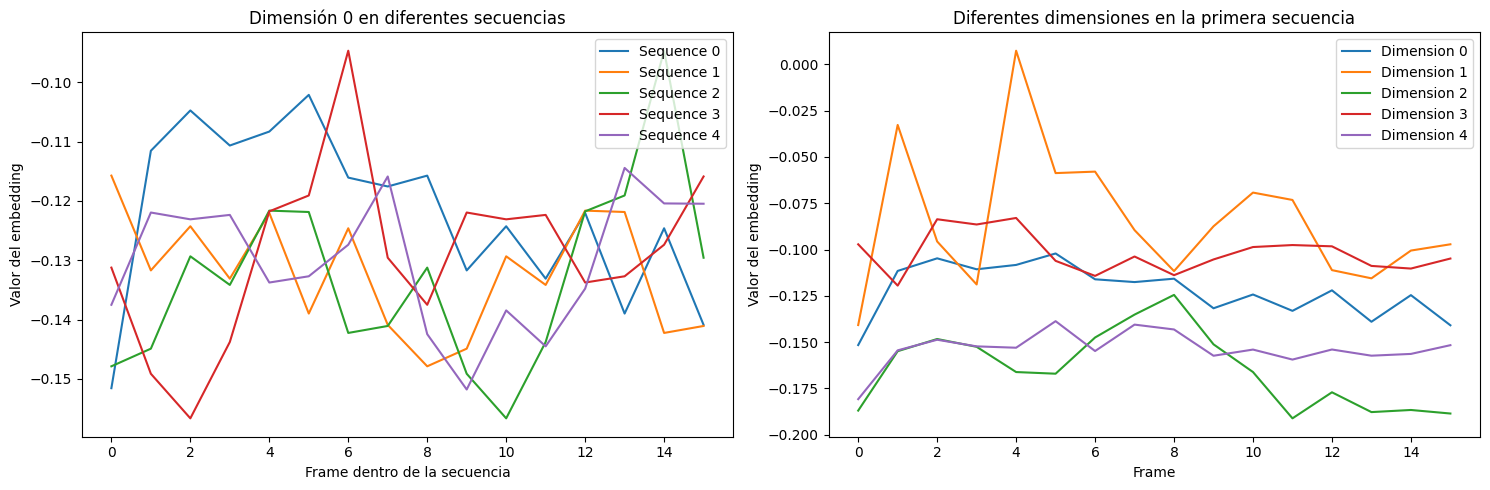

In [23]:
# Visualizar la variación temporal en algunas secuencias
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Visualizar una dimensión específica a lo largo de varias secuencias
dimension_to_plot = 0  # Primera dimensión del embedding

# Plot 1: Una dimensión a través de todas las secuencias
plt.subplot(1, 2, 1)
for i in range(min(5, len(sequences))):  # Primeras 5 secuencias
    plt.plot(sequences[i][:, dimension_to_plot], label=f'Sequence {i}')
plt.title(f'Dimensión {dimension_to_plot} en diferentes secuencias')
plt.xlabel('Frame dentro de la secuencia')
plt.ylabel('Valor del embedding')
plt.legend()

# Plot 2: Diferentes dimensiones en una secuencia
plt.subplot(1, 2, 2)
for dim in range(5):  # Primeras 5 dimensiones
    plt.plot(sequences[0][:, dim], label=f'Dimension {dim}')
plt.title('Diferentes dimensiones en la primera secuencia')
plt.xlabel('Frame')
plt.ylabel('Valor del embedding')
plt.legend()

plt.tight_layout()
plt.show()

# Dataset test

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from src.actionDetection.components.data.dataset import VideoDataset

In [29]:
# Crear datasets para validación y test
val_dataset = VideoDataset(
    root_dir="artifacts/data/processed/val",
    batch_size=32,
    sequence_length=16,
    stride=8,
    shuffle=True
)

In [30]:
# Verificar la estructura del dataset
print("Información del dataset de validación:")
print(f"Número de clases: {len(val_dataset.classes)}")
print(f"Clases: {val_dataset.classes}")
print(f"Número de batches: {len(val_dataset)}")

Información del dataset de validación:
Número de clases: 101
Clases: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth', 'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen', 'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingCello', 'PlayingDaf', 'PlayingDhol', 'PlayingFlute'

In [31]:
# Probar la carga de un batch
batch_x, batch_y = val_dataset[0]  # Cargar el primer batch
print("\nForma de los datos:")
print(f"Batch de secuencias shape: {batch_x.shape}")  # Debería ser (batch_size, sequence_length, 1280)
print(f"Batch de etiquetas shape: {batch_y.shape}")   # Debería ser (batch_size, num_classes)


Forma de los datos:
Batch de secuencias shape: (32, 16, 1280)
Batch de etiquetas shape: (32, 101)


In [32]:
# Verificar las etiquetas one-hot
print("\nEjemplo de etiquetas one-hot:")
print(f"Primera etiqueta del batch: {batch_y[0]}")
print(f"Clase predicha: {val_dataset.classes[np.argmax(batch_y[0])]}")


Ejemplo de etiquetas one-hot:
Primera etiqueta del batch: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Clase predicha: BabyCrawling


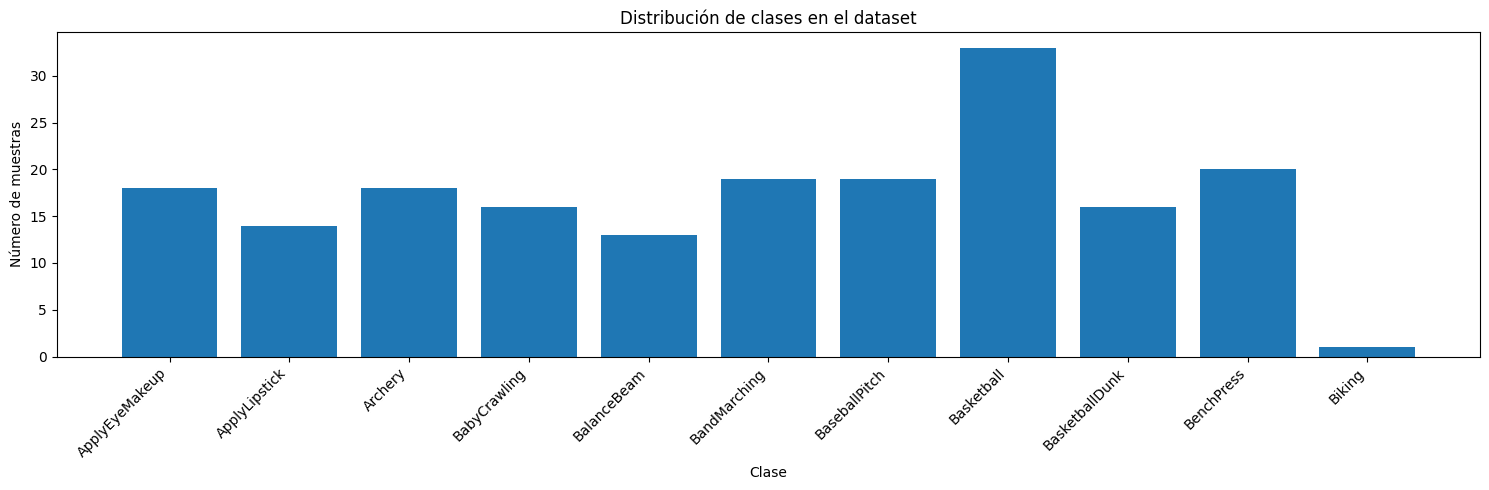

In [33]:
# Visualizar la distribución de clases
class_counts = {}
for sample in val_dataset.samples:
    class_name = sample['path'].parent.name
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

plt.figure(figsize=(15, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de clases en el dataset')
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.tight_layout()
plt.show()